#  Estados del Continuo del Hidrógeno

Darío Mitnik


In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Cosas útiles para utilizar luego
from __future__ import division

# Estética
sp.init_printing()
%matplotlib inline

#Definimos los simbolos que vamos a usar.
r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
n=sp.Symbol('n',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)
k=sp.Symbol('k',positive=True)

In [13]:
# Función Radial Hidrogénica -- Estados del Contínuo (con hipergeométricas)

def R_analytic(k,l,z,r):
    
    a = z/k # Parámetro de Sommerfeld
    
    # Imaginarios
    nj = 1j*a  
    rho=-2*k*1j*r
    
    rnum = (2*z/nj)**3 * sp.gamma(nj+l+1)
    rden = (sp.gamma(2*l+2))**2 * 2*nj * sp.gamma(nj-l)
    rnorm = sp.sqrt(rnum/rden)
    rfunc = (2*k*r)**l * sp.exp(1j*k*r) * sp.hyper((-nj+l+1,),(2*l+2,),(rho))
    R = rfunc
    return R

In [113]:
 # Definición de los vectores para plotear
    
nsize=500
xmax=5.0
xmin=0.
x = np.linspace(xmin,xmax,nsize)
psi = np.zeros(nsize,dtype=complex)
psi1 = np.zeros(nsize,dtype=complex)
psi2 = np.zeros(nsize,dtype=complex)

In [114]:
# Copiamos el array simbólico a numérico

for i in range(nsize):
    psi[i]= R_analytic(3.5,0,1,x[i]).evalf()
    psi1[i]= R_analytic(4.5,0,1,x[i]).evalf()
    psi2[i]= R_analytic(5.50,0,1,x[i]).evalf()

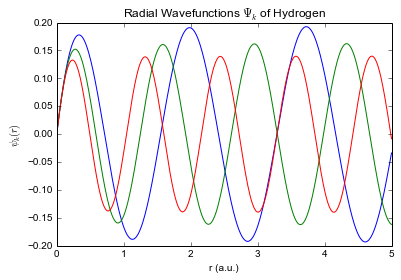

In [115]:
# Ploteo
plt.plot(x,x*psi);
plt.plot(x,x*psi1);
plt.plot(x,x*psi2);
plt.title("Radial Wavefunctions $\Psi_{k}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{k}(r)$");

# Hydrogen Atom using Finite Differences

In [116]:
from numpy import identity

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [162]:
# Normalización de las funciones

from numpy import sqrt

def Normalizate(U,x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
            suma = suma + U[i,j]**2
    suma = suma*h
    rnorm = 1/sqrt(suma)
                                                            
    # Normalization
    rsign = 1
    if U[1,j] < 0:
        rsign = -1
    rnorm = rnorm * rsign
    for i in range(0,n):
        U[i,j] = U[i,j]*rnorm
            
    return U

In [163]:
# Generación de Hamiltoniano y diagonalización

In [164]:
from numpy import diag, linspace, array
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, figure, title, show

nfunctions = 5

# array definitions
nsize = 500
xmax=20.0
Dx = (xmax)/nsize
xmin=Dx
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])

# Kinetic (T) and  Potential (V)
T = (-0.5)*Laplacian(x)
V = -1/x

# Hamiltonian
H = T + diag(V)

# Eigenvalues (E) and Eigenvectors (U)
E,U = eigh(H)

# Normalization
U=Normalizate(U,x)


In [165]:
# Plot

('E=:', 1.2461512142646147)
('E=:', 1.5240081088389501)
('E=:', 1.8267764400253035)
('E=:', 2.1543750900184766)
('E=:', 2.5067383895924236)


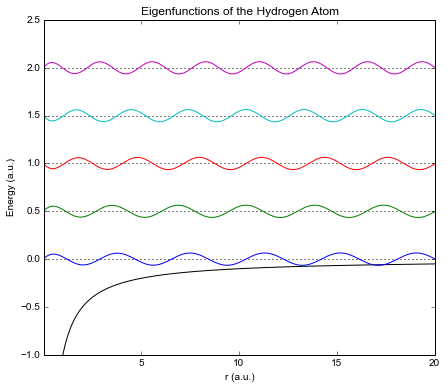

In [166]:
#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)
        
# Plot the potential
plot(x,V,color='k')
             
# Plot wavefunctions
ebase=-0.5
for i in range(10,10+nfunctions):
    ebase=ebase+0.5
    # For each of the first few solutions, plot the energy level:
    axhline(y=ebase,color='k',ls=":")
    # as well as the eigenfunction, displaced the function
    # so they don’t all pile up on each other:
    plot(x,U[:,i]+ebase)
    print("E=:",E[i])
             
axis([xmin,xmax,-1,2.5])
title("Eigenfunctions of the Hydrogen Atom")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()             

#  Comparación entre Continuo Analítico y Diagonalizado

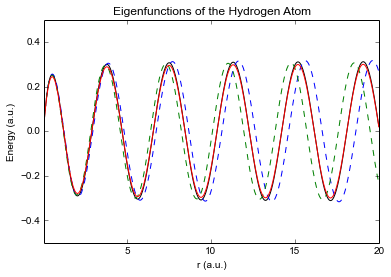

In [167]:
#Ejemplo n=10
n=10;
nmed = 25

yascale = abs(R_analytic(sqrt(2*E[n]),0,1,x[nmed]).evalf() / U[nmed,n]) ;
yscale = float(yascale)

# Copiamos el array simbólico a numérico
# Le damos k=sqrt(2*E)
for i in range(nsize):
    psi[i]= R_analytic(sqrt(2*E[n]),0,1,x[i]).evalf()
    psi1[i]= R_analytic(sqrt(2*E[n])-0.05,0,1,x[i]).evalf()
    psi2[i]= R_analytic(sqrt(2*E[n])+0.05,0,1,x[i]).evalf()

plot(x,x*psi,color='k');
plot(x,x*psi1,color='b',ls="--");
plot(x,x*psi2,color='g',ls="--");
plot(x,U[:,n]*yscale,color='r');

axis([xmin,xmax,-0.5,0.5]);
title("Eigenfunctions of the Hydrogen Atom")
xlabel("r (a.u.)")
ylabel("Energy (a.u.)")
show()